In [1]:
# import necessary libraries
import pandas as pd  
from sklearn.preprocessing import StandardScaler  
import scipy.cluster.hierarchy as sch  
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering  
from sklearn.metrics import adjusted_rand_score, silhouette_score  

In [2]:
# load the dataset
df = pd.read_csv('lifecyclesaving.csv')

# only use the numerical features for clustering
df_feat = df.drop(columns='Contry')

# print the first five features DataFrame entries
print(df_feat.head())

      sr  pop15  pop75      dpi  ddpi
0  11.43  29.35   2.87  2329.68  2.87
1  12.07  23.32   4.41  1507.99  3.93
2  13.17  23.80   4.43  2108.47  3.82
3   5.75  41.89   1.67   189.13  0.22
4  12.88  42.19   0.83   728.47  4.56


In [3]:
# standardize the dataset
scaler = StandardScaler()
scaler.fit_transform(df_feat)

array([[ 0.39658414, -0.63352758,  0.4515579 ,  1.24672132, -0.31242224],
       [ 0.54087854, -1.29910903,  1.65675574,  0.40904011,  0.06068228],
       [ 0.78888455, -1.24612742,  1.67240766,  1.02120627,  0.02196389],
       [-0.88402867,  0.75061693, -0.48755731, -0.9354867 , -1.24518353],
       [ 0.72350114,  0.78373044, -1.14493796, -0.38565041,  0.28243308],
       [-0.19863026, -0.37193089,  0.43590598,  1.91263348, -0.46729581],
       [-2.04514767,  0.51330348, -0.74581399, -0.45253727, -0.38281932],
       [ 0.50255034,  1.06629901, -1.27015332, -0.83314297,  0.9688046 ],
       [-1.05763287,  1.27491409, -0.96494087, -0.84626344, -0.2385053 ],
       [ 0.25003514,  1.38529244, -0.90233319, -0.64788645, -0.33706121],
       [ 1.61857735, -1.17769284,  1.28110966,  1.41681844,  0.08180141],
       [-1.37102227,  1.23848924, -0.86320339, -0.83492703, -0.55177231],
       [ 0.35374674, -0.80019889,  0.06025989,  0.58567199,  0.19795659],
       [ 0.66939074, -1.1070507 ,  1.8

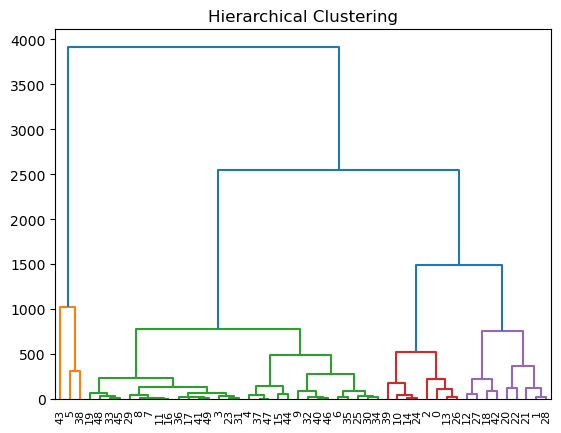

In [4]:
# compute the linkage matrix using the 'complete' linkage
linkage_matrix = sch.linkage(df_feat, method='complete')

# plot the dendrogram
dendrogram = sch.dendrogram(linkage_matrix, color_threshold=linkage_matrix[-(4 - 1), 2])
plt.title('Hierarchical Clustering')
plt.show()

In [5]:
# initialze Agglomerative Clustering with 4 clusters
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')

# fit and predict the clusters to the DataFrame
df['Cluster'] = cluster.fit_predict(df_feat)

# print assigned clusters to Countries
print(df[['Contry', 'Cluster']])

            Contry  Cluster
0        Australia        3
1          Austria        1
2          Belgium        3
3          Bolivia        2
4           Brazil        2
5           Canada        0
6            Chile        2
7            China        2
8         Colombia        2
9       Costa Rica        2
10         Denmark        3
11         Ecuador        2
12         Finland        1
13          France        3
14         Germany        3
15          Greece        2
16       Guatamala        2
17        Honduras        2
18         Iceland        1
19           India        2
20         Ireland        1
21           Italy        1
22           Japan        1
23           Korea        2
24      Luxembourg        3
25           Malta        2
26          Norway        3
27     Netherlands        1
28     New Zealand        1
29       Nicaragua        2
30          Panama        2
31        Paraguay        2
32            Peru        2
33     Philippines        2
34        Portugal  

In [6]:
# calculate and display the Silhouette Score for Agglomerative Clustering
silhouette = silhouette_score(df_feat, df['Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {silhouette}')

Silhouette Score for Agglomerative Clustering: 0.6743051467868127


In [7]:
# Results and Observations:
#
# The 'Contry' column is not needed because the problem is asking to cluster
# the data and each entry is a unique country. It has no real usefulness due 
# to clustering being part of unsupervised learning where labels are not 
# needed, just data to be grouped up.
#
# The ARI score is not meaningful in this situation also because there are 
# no predefined labels that need to be used with the same idea for the 
# unsupervised learning of clustering algorithms. However, the highest 
# achievable silhouette score is approximately 0.674, meaning the clustering
# is decently separated but not the best, with 4 clusters.
#
# I do believe that the clustering labels are somewhat correct either way as 
# looking at the more advanced countries in the world, the clustering labels 
# for them are either 0 or 1, and the less advanced countries in the world are
# 2 or 3.